In [1]:
# some plot settings
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['font.family'] = "CMU Serif"
plt.rcParams['figure.figsize'] = [10,6]
plt.rcParams['figure.dpi'] = 120 
plt.rc('text', usetex=True) 

In [2]:
# we will often use the tqdm progress bar
from tqdm.auto import tqdm,trange

## 9. The forgetful burglar problem

Consider a drunk medicine man or forgetful burglar: Starting from an arbitrary town (home), if our medicine man (burglar) wanders up and down randomly along an inﬁnity of towns (homes) that are spaced uniformly along a line, taking with equal probability steps of either one or two towns (homes) in either direction (also with equal probability) to arrive at his next location, how long can our man get away with his crooked trade? That is, how long is it before a previously hoodwinked town or a previously burgled home is revisited? This is a very difﬁcult problem to attack analytically, but it’s all duck soup for a Monte Carlo simulation. In particular, ﬁnd the probabilities that either of the men end up revisiting an old location on the kth step, where 1 ≤ k ≤ 7. (The answer for the ﬁrst case of k = 1 is, of course, trivial! Right?)

In [3]:
# how long is it before a previously hoodwinked town 
# or a previously burgled home is revisited?

import numpy as np

sims = 10**5
totalDuration = 0

for i in trange(sims) :
    # visited locations will be stored in this array
    locationsVisited = [0]
    # starting location at the origin
    currentLocation = 0
    # counter keeping track of the duration or number of steps
    duration = 0
    # emulating a do while loop, until a revisit
    while True :
        duration += 1
        # each step takes is left/right and of length 1 or 2
        step = np.random.choice([2,1])*np.random.choice([-1,1])
        # new location
        currentLocation += step
        # check if the location was visited before
        # if not add the new location, else break
        if currentLocation not in locationsVisited :
            locationsVisited = locationsVisited + [currentLocation]
        else :
            break
    totalDuration += duration

totalDuration/sims

  0%|          | 0/100000 [00:00<?, ?it/s]

3.84905

In [4]:
# probability that the burgler revisits 
# an old location on the kth step
def probK(k) :
    sims = 10**4
    # number of times revisits occur at the k'th step
    revisits = 0 

    for i in range(sims) :
        locationsVisited = [0]
        currentLocation = 0
        # counter keeping track of the duration or number of steps
        numSteps = 0
        # emulating a do while loop, until a revisit
        while True:
            numSteps += 1
            # each step takes is left/right and of length 1 or 2
            step = np.random.choice([2,1])*np.random.choice([-1,1])
            # new location
            currentLocation += step
            # check if the location was visited before
            # if not add the new location, else break
            if currentLocation not in locationsVisited :
                locationsVisited = locationsVisited + [currentLocation]
            else :
                break
        # is k steps taken until the first revisit?
        if numSteps == k :
            revisits += 1
    
    return revisits/sims

In [5]:
probDat = list(map(probK, range(1,15)))
probDat

[0.0,
 0.2465,
 0.2769,
 0.1959,
 0.1178,
 0.0733,
 0.0368,
 0.02,
 0.0112,
 0.0075,
 0.0034,
 0.0023,
 0.0011,
 0.0004]

We can plot this discrete probability distribution.

Text(0.5, 0, 'Duration until a revisit')

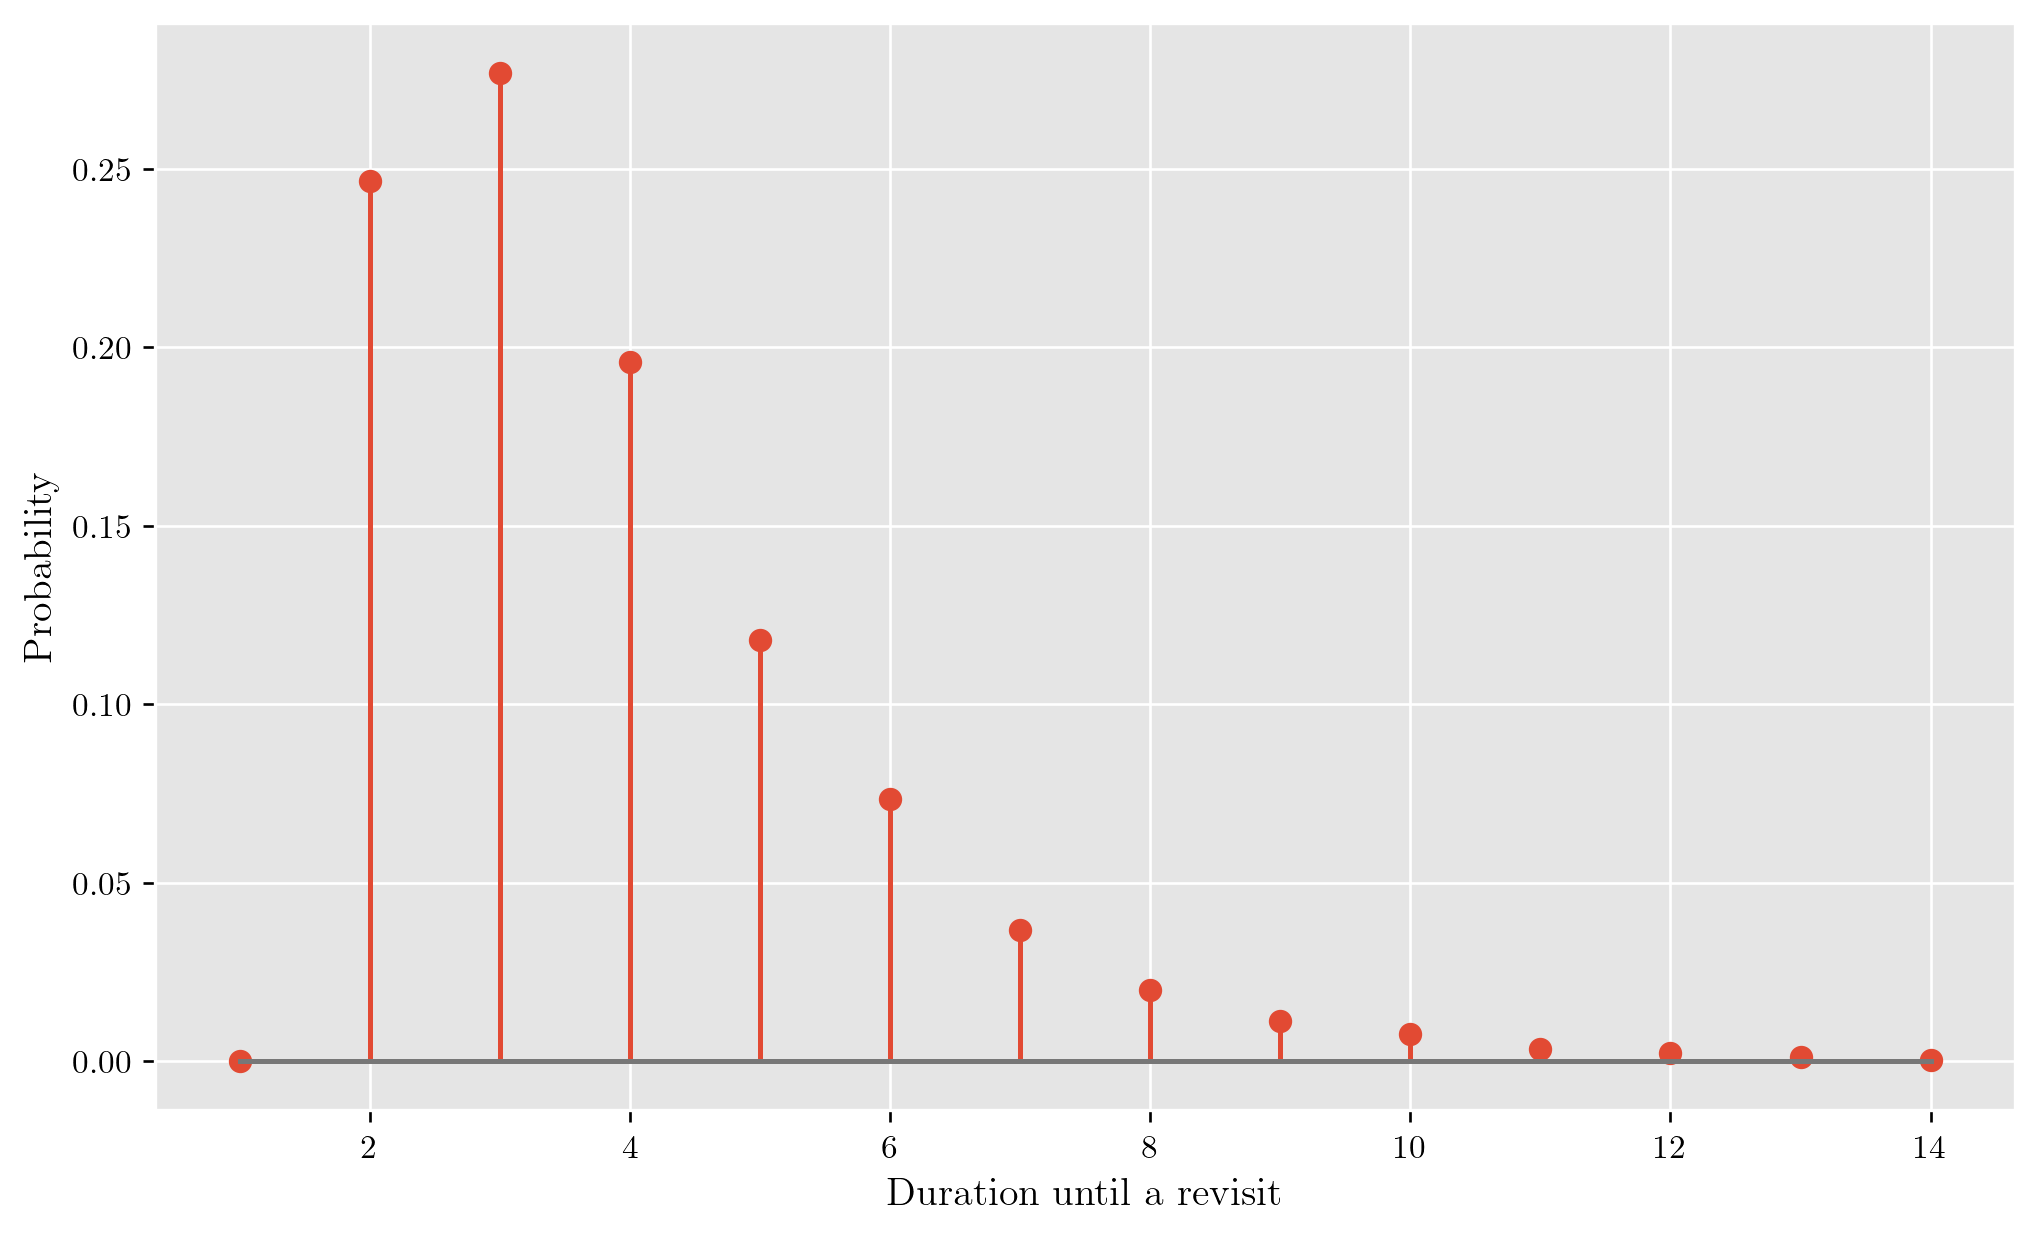

In [6]:
plt.stem(range(1,15), probDat)
plt.ylabel('Probability')
plt.xlabel('Duration until a revisit')

The average number of steps until the first revisit is given by the expectation value with the above probabilities. This is

In [7]:
np.dot(range(1,15), probDat)

3.8144

This is close to the value found directly using simulation. 